In [1]:
pip install pyodbc

Note: you may need to restart the kernel to use updated packages.


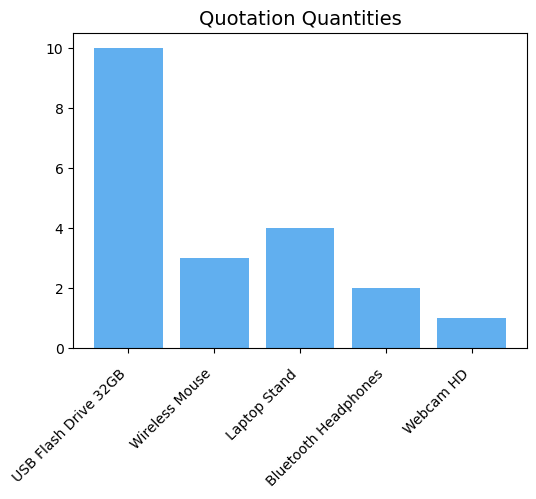

In [1]:
from tkinter import *
import pyodbc as odbc
import matplotlib.pyplot as plt
from tkinter import Tk, Label
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tkinter import ttk
from tkinter import messagebox
from tkcalendar import DateEntry
from datetime import datetime

# Connect to SQL Server
conn = odbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=DESKTOP-7I9UC6G\\SQLEXPRESS;"
    "DATABASE=python;"
    "Trusted_Connection=yes;"
)
cursor = conn.cursor()

def make_frame_clickable(frame, title, callback):
    frame.bind("<Button-1>", lambda e: callback(title))
    for child in frame.winfo_children():
        child.bind("<Button-1>", lambda e: callback(title))

root=Tk()
root.title('Dashboard')
root.geometry('1350x690+0+0')  # +0+0 means distance of frame will be 0 from x and y axis
root.config(bg='#5761B2')

from tkinter import Toplevel

notifications = []

notif_frame = ttk.Frame(root)
notif_frame.pack(pady=20)

# Function to fetch recent changes from database
def fetch_notifications():
    cursor.execute("SELECT TOP 5 'New sale recorded!' FROM Sales ORDER BY SaleDate DESC")
    new_sales = cursor.fetchall()
    
    cursor.execute("SELECT TOP 5 'Inventory updated!' FROM Inventory ORDER BY LastUpdated DESC")
    new_inventory = cursor.fetchall()
    
    cursor.execute("SELECT TOP 5 'Supplier added successfully!' FROM Suppliers ORDER BY ID DESC")
    new_suppliers = cursor.fetchall()

    latest_notifications = [notif[0] for notif in (new_sales + new_inventory + new_suppliers)]
    
    return latest_notifications

def update_notification_display(notif_window, scroll_frame):
    for widget in scroll_frame.winfo_children():
        widget.destroy()  # Clear old notifications

    Label(scroll_frame, text="Recent Notifications:", font=('times new roman', 15, 'bold')).pack(pady=10)

    notifications = fetch_notifications()
    
    for notif in notifications:
        Label(scroll_frame, text=f"- {notif}", font=('times new roman', 13), fg="white", bg="#2C3E50", padx=10, pady=5).pack(anchor="w", padx=20)

    # Re-run this function every 5 seconds
    notif_window.after(5000, lambda: update_notification_display(notif_window, scroll_frame))

# Function to open notifications window
def open_notifications():
    notif_window = Toplevel(root)
    notif_window.title("Notifications")
    notif_window.geometry("400x300+500+200")
    notif_window.config(bg="#2C3E50") 
    
    Label(notif_window, text="🔔 Notifications:", font=('times new roman', 20, 'bold')).pack(pady=10)

    canvas = Canvas(notif_window, bg="#2C3E50")
    scrollbar = Scrollbar(notif_window, orient="vertical", command=canvas.yview)
    scroll_frame = Frame(canvas, bg="#2C3E50")

    scroll_frame.bind("<Configure>", lambda e: canvas.configure(scrollregion=canvas.bbox("all")))

    canvas.create_window((0, 0), window=scroll_frame, anchor="nw")
    canvas.configure(yscrollcommand=scrollbar.set)

    update_notification_display(notif_window, scroll_frame)
   
    canvas.pack(side="left", fill="both", expand=True)
    scrollbar.pack(side="right", fill="y")

    Button(notif_window, text="Close", command=notif_window.destroy).pack(pady=15)
                                                                                                                                  
bg_image=PhotoImage(file='inventory (2).png')
titleLabel=Label(root, image=bg_image ,compound=LEFT,  text='Inventory Managment System', font=('times new roman', 40, 'bold'), bg='#010c48', fg='white', anchor='w', padx=20)
titleLabel.place(x=0,y=0, relwidth=1)

bell_icon = PhotoImage(file="bell.png")  # Ensure you have a bell.png file
bell_button = Button(root, image=bell_icon, command=open_notifications, bd=2)
bell_button.place(x=1120, y=17)  # Adjust position as needed970, y=150

LogoutButton=Button(root, text='Logout', font=('times new roman', 20, 'bold'))
LogoutButton.place(x=1200,y=9)

subtitle=Label(root, text='Welcome Admin\t\t Date: 08-07-2024\t\t Time: 12:36:13 pm', font=('times new roman', 15),bg='#4d636d', fg='white')
subtitle.place(x=0, y=68, relwidth=1)

leftFrame=Frame(root)
leftFrame.place(x=0, y=96, width=200, height=595)

logoImage=PhotoImage(file='checklist (1).png')
ImageLabel=Label(leftFrame, image=logoImage)
ImageLabel.pack()

menuLabel=Label(leftFrame, text='Menu', font=('times new roman',20),bg='#009688')
menuLabel.pack(fill=X)

emp_image=PhotoImage(file='employee.png')
employee_button=Button(leftFrame, image=emp_image ,compound=LEFT,  text='Employees', font=('times new roman', 20, 'bold'))
employee_button.pack(fill=X)

product_image=PhotoImage(file='box.png')
Product_button=Button(leftFrame, image=product_image, compound=LEFT, text='Products', font=('times new roman', 20, 'bold'))
Product_button.pack(fill=X)

panel_image=PhotoImage(file='solar.png')
Panel_button=Button(leftFrame, image=panel_image ,compound=LEFT,  text='Panels', font=('times new roman', 20, 'bold'))
Panel_button.pack(fill=X)

Inventory_image=PhotoImage(file='inventory (1).png')
Inventory_button=Button(leftFrame, image=Inventory_image ,compound=LEFT, text='Inventory', font=('times new roman', 20, 'bold'))
Inventory_button.pack(fill=X)

billing_image=PhotoImage(file='bill.png')
Billing_button=Button(leftFrame, image=billing_image ,compound=LEFT, text='Billing', font=('times new roman', 20, 'bold'))
Billing_button.pack(fill=X)

sales_image=PhotoImage(file='increase.png')
sales_button=Button(leftFrame, image=sales_image ,compound=LEFT, text='Sales', font=('times new roman', 20, 'bold'))
sales_button.pack(fill=X)

help_image=PhotoImage(file='chat.png')
help_button=Button(leftFrame, image=help_image ,compound=LEFT, text='Help', font=('times new roman', 20, 'bold'))
help_button.pack(fill=X)

exit_image=PhotoImage(file='exit.png')
exit_button=Button(leftFrame, image=exit_image ,compound=LEFT, text='Exit', font=('times new roman', 20, 'bold'))
exit_button.pack(fill=X)


graphtitle=Label(root, text='📊 Buisness Overview', font=('times new roman', 17, 'bold'), bg='#7BD5F5')
graphtitle.place(x=970, y=130)

fig, ax = plt.subplots(figsize=(5.5, 5.1))
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().place(x=780, y=170)

def update_graph(data, title, chart_type="bar"):
    ax.clear()
    ax.set_title(title, fontsize=14)

    if not data:
        ax.text(0.5, 0.5, "No data to display", fontsize=12, ha='center', va='center')
        canvas.draw()
        canvas.get_tk_widget().update_idletasks()
        return

    labels = [str(row[0]) for row in data]

    def safe_float(val):
        try:
            return float(val)
        except (ValueError, TypeError):
            return 0
            
    values = [safe_float(row[1]) for row in data]

    # Plot based on chart type
    if chart_type == "bar":
        ax.bar(labels, values, color="#61AFEF")
    elif chart_type == "line":
        ax.plot(labels, values, color="#EF476F", marker='o', linestyle='-')
    elif chart_type == "pie":
        if sum(values) == 0:
            ax.text(0.5, 0.5, "No valid data for pie chart", fontsize=12, ha='center', va='center')
        else:
            ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
            ax.axis('equal')  # Make pie chart circular
    else:
        ax.text(0.5, 0.5, "Invalid chart type", fontsize=12, ha='center', va='center')

    # Styling for bar and line charts
    if chart_type in ("bar", "line"):
        # Rotate x-axis labels
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right', va='top')
        # Padding
        ax.tick_params(axis='x', pad=10)

    # Adjust layout to prevent clipping
    fig.tight_layout()

    # Redraw the canvas
    canvas.draw()
    canvas.get_tk_widget().update_idletasks()


def fetch_employee_data():
    cursor.execute("""
        SELECT 
            e.ID, e.Name, e.Designation, e.BasicSalary, e.Status,
            FORMAT(e.JoiningDate, 'yyyy-MM-dd'), FORMAT(e.ResigningDate, 'yyyy-MM-dd'),
            s.OTDayAmount, s.OTHours, s.AdvanceTaken, s.AdvanceDeducted, s.TotalSalary
        FROM Employees1 e
        LEFT JOIN EmployeeStats s ON e.ID = s.EmployeeID
    """)
    return cursor.fetchall()

def show_data_in_window(title, data, columns, show_buttons=False, show_filters=False, show_supplier_search=False):
    data_window = Toplevel(root)
    data_window.title(title)
    data_window.geometry(f"{root.winfo_screenwidth()}x{root.winfo_screenheight()}")
    data_window.state('zoomed')
    data_window.config(bg="#96C3EB")

    Label(data_window, text=title, font=('times new roman', 30, 'bold'),
          bg="#158FAD", fg="white", pady=20).pack()

    # Filters (only for employee)
    # Filters for employee
    if show_filters:
        search_frame = Frame(data_window, bg="#96C3EB")
        search_frame.pack(pady=10)

        search_var = StringVar()
        status_var = StringVar(value="All")

        Entry(search_frame, textvariable=search_var, font=('times new roman', 14), width=30).pack(side=LEFT, padx=5)
        Button(search_frame, text="Search", font=('times new roman', 12, 'bold'),
               command=lambda: search_tree(tree, search_var.get(), status_var.get())).pack(side=LEFT, padx=5)

        Label(search_frame, text="Filter by Status:", font=('times new roman', 12, 'bold'),
              bg="#96C3EB").pack(side=LEFT, padx=10)

        filter_menu = ttk.Combobox(search_frame, textvariable=status_var,
                                   values=["All", "Working", "Resigned"], state="readonly")
        filter_menu.pack(side=LEFT)

    # Supplier Search
    elif show_supplier_search:
        search_frame = Frame(data_window, bg="#96C3EB")
        search_frame.pack(pady=10)

        search_var = StringVar()
        Entry(search_frame, textvariable=search_var, font=('times new roman', 14), width=30).pack(side=LEFT, padx=5)
        Button(search_frame, text="Search", font=('times new roman', 12, 'bold'),
               command=lambda: search_supplier_tree(tree, search_var.get())).pack(side=LEFT, padx=5)


    # Tree setup
    frame = Frame(data_window, bg="#96C3EB", bd=5, relief=SOLID)
    frame.pack(expand=True, fill="both", padx=20, pady=20)

    v_scrollbar = Scrollbar(frame, orient=VERTICAL)
    h_scrollbar = Scrollbar(frame, orient=HORIZONTAL)
    v_scrollbar.pack(side=RIGHT, fill=Y)
    h_scrollbar.pack(side=BOTTOM, fill=X)

    tree = ttk.Treeview(frame, columns=columns, show="headings",
                        yscrollcommand=v_scrollbar.set, xscrollcommand=h_scrollbar.set)
    tree.pack(expand=True, fill="both")
    v_scrollbar.config(command=tree.yview)
    h_scrollbar.config(command=tree.xview)

    for col in columns:
        tree.heading(col, text=col, anchor=CENTER)
        tree.column(col, anchor=CENTER, width=200)

    style = ttk.Style()
    style.configure("Treeview", font=("times new roman", 15), rowheight=30)
    style.configure("Treeview.Heading", font=("times new roman", 18, "bold"))

    for item in data:
        tree.insert("", "end", values=[str(value) for value in item])

    # Add buttons if required
    if show_buttons:
        btn_frame = Frame(data_window, bg="#96C3EB")
        btn_frame.pack(pady=10)

        if title == "Staffing Overview":
            Button(btn_frame, text="Add", font=('times new roman', 15, 'bold'),
                   bg="green", fg="white", width=12, command=open_add_employee_form).pack(side=LEFT, padx=15)
            Button(btn_frame, text="Edit", font=('times new roman', 15, 'bold'),
                   bg="red", fg="white", width=12, command=lambda: open_edit_employee_form(tree)).pack(side=LEFT, padx=15)
        elif title == "Supplier Hub":
            Button(btn_frame, text="Add", font=('times new roman', 15, 'bold'),
                   bg="green", fg="white", width=12, command=open_add_supplier_form).pack(side=LEFT, padx=15)
            Button(btn_frame, text="Edit", font=('times new roman', 15, 'bold'),
                   bg="red", fg="white", width=12, command=lambda: open_edit_supplier_form(tree)).pack(side=LEFT, padx=15)

    def on_double_click(event):
        region = tree.identify("region", event.x, event.y)
        if region != "cell":
            return

        row_id = tree.identify_row(event.y)
        column_id = tree.identify_column(event.x)

        x, y, width, height = tree.bbox(row_id, column_id)
        item = tree.item(row_id)
        column_index = int(column_id[1:]) - 1
        old_value = item['values'][column_index]

        entry = Entry(tree, font=('times new roman', 14))
        entry.place(x=x, y=y, width=width, height=height)
        entry.insert(0, old_value)
        entry.focus()

        def save_edit(event):
            new_value = entry.get()
            entry.destroy()
            tree.set(row_id, column=columns[column_index], value=new_value)

            emp_id = item['values'][0]  # assuming first column is ID
            field = columns[column_index]

            # Only update editable fields
            editable_fields = ["Name", "Designation", "BasicSalary", "Status"]
            if field in editable_fields:
                try:
                    cursor.execute(f"UPDATE Employees1 SET {field} = ? WHERE ID = ?", (new_value, emp_id))
                    conn.commit()
                except Exception as e:
                    messagebox.showerror("Error", f"Failed to update database: {e}")

        entry.bind("<Return>", save_edit)
        entry.bind("<FocusOut>", lambda e: entry.destroy())

    if title == "Staffing Overview":
        tree.bind("<Double-1>", on_double_click)

    Button(data_window, text="Close", font=('times new roman', 15, 'bold'),
           command=data_window.destroy, width=12).pack(pady=10)
 
def search_tree(tree, keyword, status_filter):
    keyword = keyword.lower()
    for row in tree.get_children():
        tree.delete(row)

    query = """
        SELECT 
            e.ID, e.Name, e.Designation, e.BasicSalary, e.Status,
            FORMAT(e.JoiningDate, 'yyyy-MM-dd'), FORMAT(e.ResigningDate, 'yyyy-MM-dd'),
            s.OTDayAmount, s.OTHours, s.AdvanceTaken, s.AdvanceDeducted, s.TotalSalary
        FROM Employees1 e
        LEFT JOIN EmployeeStats s ON e.ID = s.EmployeeID
        WHERE (LOWER(e.Name) LIKE ? OR LOWER(e.Designation) LIKE ?)
    """

    params = [f"%{keyword}%"] * 2
    if status_filter != "All":
        query += " AND e.Status = ?"
        params.append(status_filter)

    cursor.execute(query, params)
    results = cursor.fetchall()
    for item in results:
        tree.insert("", "end", values=item)

def search_supplier_tree(tree, keyword):
    keyword = keyword.lower()
    for row in tree.get_children():
        tree.delete(row)

    query = """
        SELECT ID, Name, Company, Contact, Materials 
        FROM Suppliers
        WHERE LOWER(Name) LIKE ? OR LOWER(Company) LIKE ? OR LOWER(Materials) LIKE ?
    """
    params = [f"%{keyword}%"] * 3
    cursor.execute(query, params)
    results = cursor.fetchall()
    for item in results:
        tree.insert("", "end", values=item)


def open_employee_window(title):
    employees = fetch_employee_data()
    columns = ["ID", "Name", "Designation", "BasicSalary", "Status",
               "JoiningDate", "ResigningDate", "OTDayAmount", "OTHours", "AdvanceTaken", "AdvanceDeducted", "TotalSalary"]
    show_data_in_window(title, employees, columns)

def open_add_employee_form():
    width, height = 600, 500
    screen_width = root.winfo_screenwidth()
    screen_height = root.winfo_screenheight()
    x = (screen_width // 2) - (width // 2)
    y = (screen_height // 2) - (height // 2)
    
    form = Toplevel(root)
    form.title("Add Employee")
    form.geometry(f"{width}x{height}+{x}+{y}")
    form.config(bg="#F2F3F4")  # Light grey background
    form.resizable(False, False)

    fields = ["Name", "Designation", "BasicSalary", "Status"]
    entry_vars = {field: StringVar() for field in fields}

    header = Label(form, text="Add New Employee", font=("times new roman", 20, 'bold'),
                   bg="#1ABC9C", fg="white", pady=10)
    header.pack(fill=X)

    container = Frame(form, bg="#F2F3F4")
    container.pack(pady=20)

    for idx, field in enumerate(fields):
        Label(container, text=field + ":", font=("times new roman", 13), bg="#F2F3F4")\
            .grid(row=idx+1, column=0, pady=8, padx=10, sticky=W)
        Entry(container, textvariable=entry_vars[field], font=("times new roman", 12), width=28)\
            .grid(row=idx+1, column=1, pady=8, padx=10)

    joining_row = len(fields)+1

    Label(container, text="Joining Date:", font=("times new roman", 13), bg="#F2F3F4")\
        .grid(row=joining_row, column=0, pady=8, padx=10, sticky=W)
    joining_date = DateEntry(container, width=20, font=("times new roman", 12))
    joining_date.grid(row=joining_row, column=1, pady=8, padx=10)

    Label(container, text="Resigning Date:", font=("times new roman", 13), bg="#F2F3F4")\
        .grid(row=joining_row+1, column=0, pady=8, padx=10, sticky=W)
    resigning_date = DateEntry(container, width=20, font=("times new roman", 12))
    resigning_date.grid(row=joining_row+1, column=1, pady=8, padx=10)
    resigning_date.config(state="disabled")

    resign_check_var = BooleanVar()

    def toggle_resign_entry():
        resigning_date.config(state="normal" if resign_check_var.get() else "disabled")

    Checkbutton(container, text="Include Resigning Date", variable=resign_check_var,
                command=toggle_resign_entry, bg="#F0F8FF").grid(row=joining_row+2, columnspan=2, pady=8)

    def submit():
        try:
            name = entry_vars["Name"].get().strip()
            designation = entry_vars["Designation"].get().strip()
            basic_salary = float(entry_vars["BasicSalary"].get())
            status = entry_vars["Status"].get().strip()
            join_date_value = joining_date.get_date()
            resign_date_value = resigning_date.get_date() if resign_check_var.get() else None

            if not name or not designation or basic_salary <= 0:
                messagebox.showerror("Input Error", "Please fill all fields correctly.")
                return

            if resign_date_value:
                status = "Resigned"

            cursor.execute("""
                INSERT INTO Employees1 (Name, Designation, BasicSalary, Status, JoiningDate, ResigningDate)
                VALUES (?, ?, ?, ?, ?, ?)
            """, (
                 name, designation, basic_salary,
                status, join_date_value, resign_date_value
            ))
            conn.commit()

            messagebox.showinfo("Success", "Employee added successfully!")
            form.destroy()

        except Exception as e:
            messagebox.showerror("Error", f"Could not add employee:\n{str(e)}")

    Button(form, text="Submit", font=("times new roman", 14, 'bold'),
           bg="#2980B9", fg="white", width=12, command=submit).pack(pady=20)


def open_edit_employee_form(tree):
    selected = tree.focus()
    if not selected:
        messagebox.showerror("Error", "Please select an employee to edit.")
        return

    values = tree.item(selected)['values']

    # Centered window size
    width, height = 600, 500
    screen_width = root.winfo_screenwidth()
    screen_height = root.winfo_screenheight()
    x = (screen_width // 2) - (width // 2)
    y = (screen_height // 2) - (height // 2)

    form = Toplevel(root)
    form.title("Edit Employee")
    form.geometry(f"{width}x{height}+{x}+{y}")
    form.config(bg="#F2F3F4")  # Light grey background
    form.resizable(False, False)

    # Header
    Label(form, text="Edit Employee Details", font=("Helvetica", 20, 'bold'),
          bg="#5DADE2", fg="white", pady=12).pack(fill=X)

    # Container
    container = Frame(form, bg="#F2F3F4")
    container.pack(pady=20, padx=30)

    fields = ["Name", "Designation", "BasicSalary", "Status", "JoiningDate", "ResigningDate"]
    entry_vars = {field: StringVar(value=str(values[i+1])) for i, field in enumerate(fields)}

    for idx, field in enumerate(fields):
        Label(container, text=field + ":", font=("Helvetica", 13, 'bold'), bg="#F2F3F4", anchor=W).grid(
            row=idx, column=0, sticky=W, pady=8, padx=5)
        
        if field in ["JoiningDate", "ResigningDate"]:
            entry = DateEntry(container, textvariable=entry_vars[field], width=20, font=("Helvetica", 12))
        else:
            entry = Entry(container, textvariable=entry_vars[field], font=("Helvetica", 12), width=30)
        
        entry.grid(row=idx, column=1, pady=8, padx=10)

    def update():
        try:
            emp_id = values[0]
            status = entry_vars["Status"].get()
            if entry_vars["ResigningDate"].get():
                status = "Resigned"

            cursor.execute("""
                UPDATE Employees1 SET Name=?, Designation=?, BasicSalary=?, Status=?, JoiningDate=?, ResigningDate=?
                WHERE ID=?
            """, (
                entry_vars["Name"].get(), entry_vars["Designation"].get(), float(entry_vars["BasicSalary"].get()),
                status, entry_vars["JoiningDate"].get(), entry_vars["ResigningDate"].get(), emp_id
            ))
            conn.commit()
            messagebox.showinfo("Success", "Employee updated successfully!")
            form.destroy()
        except Exception as e:
            messagebox.showerror("Error", f"Could not update employee:\n{str(e)}")

    # Update button
    Button(form, text="Update", font=("Helvetica", 14, 'bold'),
           bg="#27AE60", fg="white", activebackground="#1E8449", width=14,
           command=update).pack(pady=20)

def open_add_supplier_form():
    width, height = 500, 400
    x = (root.winfo_screenwidth() // 2) - (width // 2)
    y = (root.winfo_screenheight() // 2) - (height // 2)

    form = Toplevel(root)
    form.title("Add Supplier")
    form.geometry(f"{width}x{height}+{x}+{y}")
    form.config(bg="#F2F3F4")
    form.resizable(False, False)

    fields = ["Name", "Company", "Contact", "Materials"]
    entry_vars = {field: StringVar() for field in fields}

    Label(form, text="Add New Supplier", font=("Helvetica", 18, 'bold'),
          bg="#5DADE2", fg="white", pady=10).pack(fill=X)

    container = Frame(form, bg="#F2F3F4")
    container.pack(pady=20, padx=30)

    for idx, field in enumerate(fields):
        Label(container, text=field + ":", font=("Helvetica", 13, 'bold'), bg="#F2F3F4").grid(
            row=idx, column=0, sticky=W, pady=8, padx=5)
        Entry(container, textvariable=entry_vars[field], font=("Helvetica", 12), width=30).grid(
            row=idx, column=1, pady=8, padx=5)

    def submit_supplier():
        try:
            cursor.execute("""
                INSERT INTO Suppliers (Name, Company, Contact, Materials)
                VALUES (?, ?, ?, ?)
            """, (
                entry_vars["Name"].get(), entry_vars["Company"].get(),
                entry_vars["Contact"].get(), entry_vars["Materials"].get()
            ))
            conn.commit()
            messagebox.showinfo("Success", "Supplier added successfully!")
            form.destroy()
        except Exception as e:
            messagebox.showerror("Error", f"Could not add supplier:\n{str(e)}")

    Button(form, text="Submit", font=("Helvetica", 14, 'bold'),
           bg="#27AE60", fg="white", width=14, command=submit_supplier).pack(pady=20)

def open_edit_supplier_form(tree):
    selected = tree.focus()
    if not selected:
        messagebox.showerror("Error", "Please select a supplier to edit.")
        return

    values = tree.item(selected)['values']

    width, height = 500, 400
    x = (root.winfo_screenwidth() // 2) - (width // 2)
    y = (root.winfo_screenheight() // 2) - (height // 2)

    form = Toplevel(root)
    form.title("Edit Supplier")
    form.geometry(f"{width}x{height}+{x}+{y}")
    form.config(bg="#F2F3F4")
    form.resizable(False, False)

    fields = ["Name", "Company", "Contact", "Materials"]
    entry_vars = {field: StringVar(value=str(values[i+1])) for i, field in enumerate(fields)}

    Label(form, text="Edit Supplier Details", font=("Helvetica", 18, 'bold'),
          bg="#5DADE2", fg="white", pady=10).pack(fill=X)

    container = Frame(form, bg="#F2F3F4")
    container.pack(pady=20, padx=30)

    for idx, field in enumerate(fields):
        Label(container, text=field + ":", font=("Helvetica", 13, 'bold'), bg="#F2F3F4").grid(
            row=idx, column=0, sticky=W, pady=8, padx=5)
        Entry(container, textvariable=entry_vars[field], font=("Helvetica", 12), width=30).grid(
            row=idx, column=1, pady=8, padx=5)

    def update_supplier():
        try:
            cursor.execute("""
                UPDATE Suppliers SET Name=?, Company=?, Contact=?, Materials=?
                WHERE ID=?
            """, (
                entry_vars["Name"].get(), entry_vars["Company"].get(),
                entry_vars["Contact"].get(), entry_vars["Materials"].get(),
                values[0]
            ))
            conn.commit()
            messagebox.showinfo("Success", "Supplier updated successfully!")
            form.destroy()
        except Exception as e:
            messagebox.showerror("Error", f"Could not update supplier:\n{str(e)}")

    Button(form, text="Update", font=("Helvetica", 14, 'bold'),
           bg="#27AE60", fg="white", width=14, command=update_supplier).pack(pady=20)


def open_employee_window(title):
    def refresh():
        open_employee_window(title)
    employees = fetch_employee_data()
    columns = ["ID", "Name", "Designation", "BasicSalary", "Status",
               "JoiningDate", "ResigningDate", "OTDayAmount", "OTHours", "AdvanceTaken", "AdvanceDeducted", "TotalSalary"]
    show_data_in_window(title, employees, columns, show_buttons=True, show_filters=True, show_supplier_search=False)

emp_frame=Frame(root, bg='#2C3E50', bd=3,  relief=RIDGE)
emp_frame.place(x=230, y=125, height=170, width=230)
total_emp_image=PhotoImage(file='team.png')
total_emp_image_label=Label(emp_frame, image=total_emp_image, bg='#2C3E50')
total_emp_image_label.pack()
total_emp_label=Label(emp_frame, text='Staffing Overview', font=('times new roman', 15, 'bold') ,bg='#2C3E50', fg='white')
total_emp_label.pack()
total_emp_count_label=Label(emp_frame, text='0', bg='#2C3E50',fg='white', font=('times new roman', 20, 'bold'))
total_emp_count_label.pack()
make_frame_clickable(emp_frame, 'Staffing Overview', open_employee_window)

def fetch_supplier_data():
    cursor.execute("SELECT ID, Name, Company, Contact, Materials FROM Suppliers")
    suppliers = cursor.fetchall()
    return suppliers
    
def open_supplier_window(title):
    from collections import Counter 
    suppliers = fetch_supplier_data()
    show_data_in_window(title, suppliers, ["ID", "Name", "Company", "Contact", "Materials"],
                        show_buttons=True, show_filters=False, show_supplier_search=True)
    
sup_frame=Frame(root, bg='#2C3E50', bd=3, relief=RIDGE)
sup_frame.place(x=520, y=125, height=170, width=230)
total_sup_image=PhotoImage(file='supplier.png')
total_sup_image_label=Label(sup_frame, image=total_sup_image, bg='#2C3E50')
total_sup_image_label.pack()
total_sup_label=Label(sup_frame, text='Supplier Hub', font=('times new roman', 15, 'bold') ,bg='#2C3E50', fg='white')
total_sup_label.pack()
total_sup_count_label=Label(sup_frame, text='0', bg='#2C3E50',fg='white', font=('times new roman', 20, 'bold'))
total_sup_count_label.pack()
make_frame_clickable(sup_frame, 'Supplier Hub', open_supplier_window)

def open_revenue_window(title):
    revenue_data = [("Q1", 20000), ("Q2", 30000), ("Q3", 40000), ("Q4", 50000)]
    update_graph(revenue_data, "Quarterly Revenue", chart_type="line")
    messagebox.showinfo("Coming Soon", "Revenue insights coming soon!")

revenue_frame=Frame(root, bg='#2C3E50', bd=3, relief=RIDGE)
revenue_frame.place(x=230, y=310, height=170, width=230)
total_revenue_image=PhotoImage(file='revenue.png')
total_revenue_image_label=Label(revenue_frame, image=total_revenue_image, bg='#2C3E50')
total_revenue_image_label.pack()
total_revenue_label=Label(revenue_frame, text='Revenue Insights', font=('times new roman', 15, 'bold') ,bg='#2C3E50', fg='white')
total_revenue_label.pack()
total_revenue_count_label=Label(revenue_frame, text='0', bg='#2C3E50',fg='white', font=('times new roman', 20, 'bold'))
total_revenue_count_label.pack()
make_frame_clickable(revenue_frame, 'Revenue Insights', open_revenue_window)


def show_data_in_product_window(title, data, columns):
    data_window = Toplevel(root)
    data_window.title(title)
    data_window.geometry(f"{root.winfo_screenwidth()}x{root.winfo_screenheight()}")
    data_window.state('zoomed')
    data_window.config(bg="#96C3EB")

    Label(data_window, text=title, font=('times new roman', 30, 'bold'), bg="#158FAD", fg="white", pady=20).pack(fill=X)

     # === Search and Date Filter Bar ===
    filter_frame = Frame(data_window, bg="#96C3EB")
    filter_frame.pack(pady=10, padx=20, fill=X)

    Label(filter_frame, text="Search Customer", font=('times new roman', 14), bg="#96C3EB").pack(side=LEFT)
    search_var = StringVar()
    search_entry = Entry(filter_frame, textvariable=search_var, font=('times new roman', 14), width=30)
    search_entry.pack(side=LEFT, padx=10)

    # Date range selection
    Label(filter_frame, text="From:", font=('times new roman', 14), bg="#96C3EB").pack(side=LEFT, padx=(20, 5))
    from_date = DateEntry(filter_frame, font=('times new roman', 14), date_pattern='yyyy-mm-dd')
    from_date.pack(side=LEFT)

    Label(filter_frame, text="To:", font=('times new roman', 14), bg="#96C3EB").pack(side=LEFT, padx=(20, 5))
    to_date = DateEntry(filter_frame, font=('times new roman', 14), date_pattern='yyyy-mm-dd')
    to_date.pack(side=LEFT)

    Button(filter_frame, text="Filter", font=('times new roman', 12), command=lambda: filter_table(), bg="#158FAD", fg="white"
          ).pack(side=LEFT, padx=20)

 
    # === Scrollable Canvas Setup ===
    canvas_frame = Frame(data_window)
    canvas_frame.pack(expand=True, fill=BOTH)

    canvas = Canvas(canvas_frame, bg="#96C3EB")
    canvas.pack(side=LEFT, fill=BOTH, expand=True)

    v_scroll = Scrollbar(canvas_frame, orient=VERTICAL, command=canvas.yview)
    v_scroll.pack(side=RIGHT, fill=Y)

    h_scroll = Scrollbar(data_window, orient=HORIZONTAL, command=canvas.xview)
    h_scroll.pack(side=BOTTOM, fill=X)
   
    canvas.configure(yscrollcommand=v_scroll.set, xscrollcommand=h_scroll.set)

    table_frame = Frame(canvas, bg="#EAF4FF")
    table_window= canvas.create_window((0, 0), window=table_frame, anchor="nw")

    def update_scrollregion(event=None):
        canvas.configure(scrollregion=canvas.bbox("all"))
        # Optional: Resize canvas window width
        canvas.itemconfig(table_window, width=canvas.winfo_width())

    table_frame.bind("<Configure>", update_scrollregion)
    canvas.bind("<Configure>", update_scrollregion)


    product_vars = {}
    product_names = {}

    # === Function to Populate the Table ===
    def render_table(filtered_data):
        for widget in table_frame.winfo_children():
            widget.destroy()

        headers = ["Select"] + columns
        for col_index, header in enumerate(headers):
            col_width = 6 if col_index == 0 else 18  # ✅ Narrow checkbox column
            Label(table_frame, text=header, font=('times new roman', 14, 'bold'), bg="#158FAD", fg="white", width=col_width, anchor="center"
                 ).grid(row=0, column=col_index, sticky="nsew", padx=2, pady=4)

        for row_index, row_data in enumerate(filtered_data):
            index = row_index
            var = IntVar()
            product_vars[index] = var
            product_names[index] = row_data[0]

            Checkbutton(table_frame, variable=var, bg="#EAF4FF").grid(row=row_index + 1, column=0, sticky="w", padx=5, pady=2)

            for col_index, cell_value in enumerate(row_data):
                Label(table_frame, text=str(cell_value), font=('times new roman', 12), bg="#EAF4FF",
                      anchor="center", justify=CENTER, width=15
                     ).grid(row=row_index + 1, column=col_index + 1, sticky="nsew", padx=2, pady=2)

    # === Filter Handler ===
    def filter_table(*args):
        query = search_var.get().strip().lower()
        from_d = from_date.get_date()
        to_d = to_date.get_date()

        def match(row):
            name_match = query in row[0].lower()
            try:
                row_date = datetime.strptime(row[3], '%Y-%m-%d').date()  # Assuming LastUpdated is at index 3
                date_match = from_d <= row_date <= to_d
            except Exception:
                date_match = False
            return name_match and date_match

        filtered = [row for row in data if match(row)]
        render_table(filtered)

    search_var.trace_add("write", filter_table)
    render_table(data)

    def _on_mousewheel(event):
        canvas.yview_scroll(int(-1*(event.delta/120)), "units")
        canvas.xview_scroll(int(-1*(event.delta/120)), "units") 
    canvas.bind("<MouseWheel>", _on_mousewheel)

    # === Process Button Action ===
    def update_selected_rows(new_status):
        selected_rows = [data[i] for i, v in product_vars.items() if v.get() == 1]
        if not selected_rows:
            messagebox.showwarning("No Selection", "Please select at least one quotation.")
            return

        try:
            for row in selected_rows:
                cursor.execute(
                    "UPDATE Quotations SET OrderStatus = ? WHERE CustomerName = ? AND ProductName = ? AND QuotationDate = ?",
                    (new_status, row[0], row[1], row[4]),
                )
            conn.commit()
            messagebox.showinfo("Success", f"Selected quotations marked as '{new_status}'.")
            # refresh data
            refreshed = fetch_customer_quotations()
            render_table(refreshed)
            update_graph([(r[1], r[2]) for r in refreshed], "Quotation Quantities", chart_type="bar")
        except Exception as exc:
            conn.rollback()
            messagebox.showerror("Error", str(exc))

    # === Action Buttons ===
    btn_frame = Frame(data_window, bg="#96C3EB")
    btn_frame.pack(pady=20)

    Button(btn_frame, text="Confirm", font=('times new roman', 15, 'bold'), bg="green", fg="white", width=12, command=lambda: update_selected_rows("Confirmed")
          ).pack(side=LEFT, padx=40)

    Button(btn_frame, text="Cancel", font=('times new roman', 15, 'bold'),bg="red", fg="white", width=12,command=lambda: update_selected_rows("Cancelled")
          ).pack(side=LEFT, padx=40)

    Button(btn_frame, text="Close", font=('times new roman', 15, 'bold'), command=data_window.destroy, width=12
          ).pack(side=LEFT, padx=40)

def fetch_customer_quotations():
    cursor.execute("SELECT CustomerName, ProductName, Quantity, Price, QuotationDate, OrderStatus FROM Quotations")
    return cursor.fetchall()

def open_quotation_window(_=None):
    rows = fetch_customer_quotations()
    show_data_in_product_window(
        "Customer Quotations",
        rows,
        ["CustomerName", "ProductName", "Quantity", "Price", "QuotationDate", "OrderStatus"],
    )
    update_graph([(r[1], r[2]) for r in rows], "Quotation Quantities", chart_type="bar")

product_frame=Frame(root, bg='#2C3E50', bd=3, relief=RIDGE)
product_frame.place(x=520, y=310, height=170, width=230)
total_product_image=PhotoImage(file='delivery-box.png')
total_product_image_label=Label(product_frame, image=total_product_image, bg='#2C3E50')
total_product_image_label.pack()
total_product_label=Label(product_frame, text='Quotation', font=('times new roman', 15, 'bold') ,bg='#2C3E50', fg='white')
total_product_label.pack()
total_product_count_label=Label(product_frame, text='0', bg='#2C3E50',fg='white', font=('times new roman', 20, 'bold'))
total_product_count_label.pack()
make_frame_clickable(product_frame, "Quotation",  open_quotation_window)

def fetch_order_status():
    cursor.execute("Select OrderID, CustomerID, ProductID, Quantity, TotalAmount, OrderDate, Status, PaymentMethod, ShippingAddress FROM Orders")
    return cursor.fetchall()

def open_order_window(title):
    order_data = fetch_order_status() 
    show_data_in_window(title, order_data, ["OrderID", "CustomerID", "ProductID", "Quantity", "TotalAmount", "OrderDate", "Status", "PaymentMethod", "ShippingAddress"])
    update_graph([(row[0], row[3]) for row in order_data], "Order Quantities", chart_type="bar")

order_frame=Frame(root, bg='#2C3E50', bd=3, relief=RIDGE)
order_frame.place(x=375, y=500, height=170, width=230)
total_order_image=PhotoImage(file='check-out.png')
total_order_image_label=Label(order_frame, image=total_order_image, bg='#2C3E50')
total_order_image_label.pack()
total_order_label=Label(order_frame, text="Logistics & Dispatch", font=('times new roman', 15, 'bold') ,bg='#2C3E50', fg='white')
total_order_label.pack()
total_order_count_label=Label(order_frame, text='0', bg='#2C3E50',fg='white', font=('times new roman', 20, 'bold'))
total_order_count_label.pack()
make_frame_clickable(order_frame, "Logistics & Dispatch", open_order_window)

root.mainloop()